# Función XOR


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [10]:
keras.__version__

'2.2.4-tf'

## Definición de entradas para función XOR

In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([0, 1, 1, 0], dtype=np.float32)[:, None]
X.shape, Y.shape

((4, 2), (4, 1))

In [8]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [9]:
Y

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

## Modelo en Keras

In [155]:
model = keras.Sequential([
    keras.layers.Dense(2, activation='sigmoid', bias_initializer=tf.constant_initializer(0), input_shape=(2,), name='ands'), 
    keras.layers.Dense(1, activation='sigmoid', name='or')
], name="xor_model")

model.summary()

Model: "xor_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ands (Dense)                 (None, 2)                 6         
_________________________________________________________________
or (Dense)                   (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.weights

[<tf.Variable 'ands_9/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 7.3838143, -7.213379 ],
        [-7.7123594,  6.744856 ]], dtype=float32)>,
 <tf.Variable 'ands_9/bias:0' shape=(2,) dtype=float32, numpy=array([-3.9508338, -3.6935449], dtype=float32)>,
 <tf.Variable 'or_9/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[7.297353 ],
        [7.5652046]], dtype=float32)>,
 <tf.Variable 'or_9/bias:0' shape=(1,) dtype=float32, numpy=array([-3.6550539], dtype=float32)>]

In [157]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.learning_rate.assign(0.01)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.01>

In [237]:
history = model.fit(x=X, y=Y, epochs=1000, verbose=0)

In [238]:
model.predict(X)

array([[0.00996553],
       [0.9920561 ],
       [0.99063814],
       [0.00916983]], dtype=float32)

## Función de pérdida

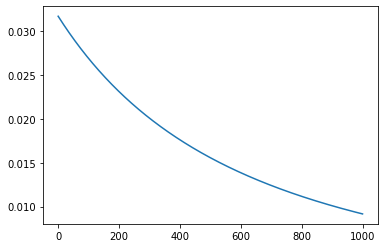

In [241]:
plt.plot(history.history['loss'])

## Límites de decisión

In [242]:
X1, X2 = np.meshgrid(np.linspace(0,1), np.linspace(0,1))
X_area = np.hstack( (X1.flatten()[:, None], X2.flatten()[:, None]) )
Y_area = model.predict(X_area)

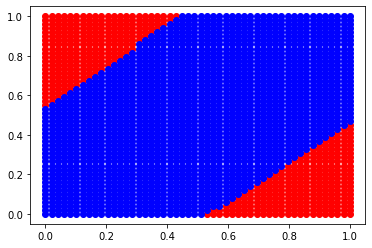

In [243]:
filtro = Y_area[:,0] > 0.5
plt.plot(X1.flatten()[filtro], X2.flatten()[filtro], 'ro')
plt.plot(X1.flatten()[filtro == False], X2.flatten()[filtro == False], 'bo')